## Data Preparation

In [587]:
# Importing Libraries.
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Reading Database.

df = pd.read_csv('ESS11-subset.csv')
df.head()

,name,essround,edition,proddate,idno,cntry,dweight,pspwght,pweight,anweight,...,edlvdch,educgb1,edubgb2,edagegb,emplrel,nacer2,isco08,prob,stratum,psu
0,ESS11e02,11,2.0,20.11.2024,50014,FR,1.010005,1.053318,3.184377,3.354163,...,NaN,NaN,NaN,NaN,1,70,1321,0.000121,617,6409
1,ESS11e02,11,2.0,20.11.2024,50047,FR,0.991407,3.267433,3.184377,10.404737,...,NaN,NaN,NaN,NaN,1,84,4419,0.000123,617,6393
2,ESS11e02,11,2.0,20.11.2024,50131,FR,1.004306,0.678151,3.184377,2.159489,...,NaN,NaN,NaN,NaN,1,86,2240,0.000122,620,6217
3,ESS11e02,11,2.0,20.11.2024,50152,FR,1.004392,1.473851,3.184377,4.693297,...,NaN,NaN,NaN,NaN,1,55,5322,0.000122,635,6370
4,ESS11e02,11,2.0,20.11.2024,50160,FR,1.001768,0.664462,3.184377,2.115897,...,NaN,NaN,NaN,NaN,1,16,7522,0.000122,628,6267


In [588]:
# Getting rid of the variables with no values at all.
for i in df.columns:
  if df[i].any() != True:
    df.drop(i, axis=1, inplace=True)

df.head()

,name,essround,edition,proddate,idno,cntry,dweight,pspwght,pweight,anweight,...,impcntr,imueclt,imwbcnt,edlvdfr,emplrel,nacer2,isco08,prob,stratum,psu
0,ESS11e02,11,2.0,20.11.2024,50014,FR,1.010005,1.053318,3.184377,3.354163,...,2,6,5,21,1,70,1321,0.000121,617,6409
1,ESS11e02,11,2.0,20.11.2024,50047,FR,0.991407,3.267433,3.184377,10.404737,...,3,4,4,6,1,84,4419,0.000123,617,6393
2,ESS11e02,11,2.0,20.11.2024,50131,FR,1.004306,0.678151,3.184377,2.159489,...,2,7,88,15,1,86,2240,0.000122,620,6217
3,ESS11e02,11,2.0,20.11.2024,50152,FR,1.004392,1.473851,3.184377,4.693297,...,3,3,2,2,1,55,5322,0.000122,635,6370
4,ESS11e02,11,2.0,20.11.2024,50160,FR,1.001768,0.664462,3.184377,2.115897,...,3,5,4,18,1,16,7522,0.000122,628,6267


In [589]:
# Finding out how many values are there per column and nan values.
# Everything should be filled. No valid encodings are present.
print(df.count(), end="\t")
df.isna().sum()

name        1771
essround    1771
edition     1771
proddate    1771
idno        1771
cntry       1771
dweight     1771
pspwght     1771
pweight     1771
anweight    1771
netustm     1771
ppltrst     1771
pplfair     1771
pplhlp      1771
polintr     1771
trstlgl     1771
trstplc     1771
trstprt     1771
vote        1771
contplt     1771
lrscale     1771
stflife     1771
stfeco      1771
stfgov      1771
stfedu      1771
gincdif     1771
euftf       1771
lrnobed     1771
imsmetn     1771
imdfetn     1771
impcntr     1771
imueclt     1771
imwbcnt     1771
edlvdfr     1771
emplrel     1771
nacer2      1771
isco08      1771
prob        1771
stratum     1771
psu         1771
dtype: int64	

,0
name,0
essround,0
edition,0
proddate,0
idno,0
cntry,0
dweight,0
pspwght,0
pweight,0
anweight,0


In [590]:
# Removing identification and weighting columns and prob columns.

df = df.drop(columns=["name", "essround", "edition", "proddate", "idno", "cntry", "dweight", "pspwght", "pweight", "anweight", "prob", "stratum", "psu"])
df.head()

,netustm,ppltrst,pplfair,pplhlp,polintr,trstlgl,trstplc,trstprt,vote,contplt,...,lrnobed,imsmetn,imdfetn,impcntr,imueclt,imwbcnt,edlvdfr,emplrel,nacer2,isco08
0,480,5,5,2,2,7,7,2,1,2,...,3,2,2,2,6,5,21,1,70,1321
1,240,6,6,5,1,5,5,4,1,2,...,1,2,3,3,4,4,6,1,84,4419
2,240,4,5,2,3,7,8,3,2,2,...,1,2,2,2,7,88,15,1,86,2240
3,180,0,6,4,4,6,6,0,3,2,...,1,2,2,3,3,2,2,1,55,5322
4,60,5,6,6,3,8,9,3,2,2,...,1,2,3,3,5,4,18,1,16,7522


In [591]:
### List of valid variables to work with.

print(df.columns.values)
len(df.columns.values)

['netustm' 'ppltrst' 'pplfair' 'pplhlp' 'polintr' 'trstlgl' 'trstplc'
 'trstprt' 'vote' 'contplt' 'lrscale' 'stflife' 'stfeco' 'stfgov' 'stfedu'
 'gincdif' 'euftf' 'lrnobed' 'imsmetn' 'imdfetn' 'impcntr' 'imueclt'
 'imwbcnt' 'edlvdfr' 'emplrel' 'nacer2' 'isco08']


27

In [592]:
# Code for identifying per column how many values there are that correspond to "Refusal", "Don't Know", or "No Answer." We intend to discard these values for subsequent analysis.

for col in df.columns:

  # Checking that these columns don't belong to a group with special encoding. This means, either the encoding for non valid values is one digit, or they are more than 10 but, since the categories are also more than 10, then another rule has to be applied to them.

  if col not in ("netustm", "polintr", "vote", "contplt", "gincdif", "lrnobed", "imsmetn", "imdfetn", "impcntr", "emplrel", "nacer2", "isco08", "edlvdfr"):
    count = 0
    for val in df[col]:
      if val > 10:
        count += 1
    pct_novalid = count / len(df[col])
    print(col, f"{round(pct_novalid * 100, 2)}%")

  # Counting non valid values of columns with special encodings.

  elif col in ("netustm", "edlvdfr"):
    count = 0
    for val in df[col]:
      if val in (6666, 7777, 8888, 9999):
        count += 1
    pct_novalid = count / len(df[col])
    print(col, f"{round(pct_novalid * 100, 2)}%")

  elif col in ("polintr", "vote", "contplt", "lrnobed", "imsmetn", "imdfetn", "impcntr", "gincdif"):
    count = 0
    for val in df[col]:
      if val in (7, 8, 9):
        count += 1
    pct_novalid = count / len(df[col])
    print(col, f"{round(pct_novalid * 100, 2)}%")

  elif col in "emplrel":
    count = 0
    for val in df[col]:
      if val in (6, 7, 8, 9):
        count += 1
    pct_novalid = count / len(df[col])
    print(col, f"{round(pct_novalid * 100, 2)}%")

  elif col in "isco08":
    count = 0
    for val in df[col]:
      if val in (66666, 77777, 88888, 99999):
        count += 1
    pct_novalid = count / len(df[col])
    print(col, f"{round(pct_novalid * 100, 2)}%")

  elif col in "nacer2":
    count = 0
    for val in df[col]:
      if val in (666, 777, 888, 999):
        count += 1
    pct_novalid = count / len(df[col])
    print(col, f"{round(pct_novalid * 100, 2)}%")

netustm 18.35%
ppltrst 0.62%
pplfair 0.45%
pplhlp 0.28%
polintr 0.06%
trstlgl 0.4%
trstplc 0.23%
trstprt 1.41%
vote 1.81%
contplt 0.45%
lrscale 11.24%
stflife 1.86%
stfeco 2.82%
stfgov 2.88%
stfedu 2.09%
gincdif 1.24%
euftf 8.02%
lrnobed 0.51%
imsmetn 3.73%
imdfetn 3.27%
impcntr 3.39%
imueclt 1.36%
imwbcnt 2.37%
edlvdfr 0.11%
emplrel 8.3%
nacer2 8.7%
isco08 8.36%


,netustm
count,1446.000000
mean,215.272476
std,176.356768
min,0.000000
25%,90.000000
50%,180.000000
75%,300.000000
max,1200.000000


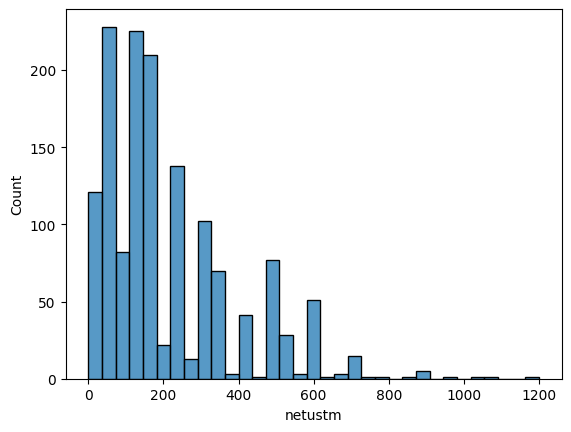

In [593]:
# Check if there are any outliers in the numerical variable netustm (use of internet) before proceeding with imputation of values. We are also getting rid of special encodings.

df_netustm_nospecencodings = df.drop(df[df["netustm"].isin([6666, 7777, 8888, 9999])].index)

sns.histplot(data=df_netustm_nospecencodings, x="netustm")
df_netustm_nospecencodings["netustm"].describe()

In [594]:
# Decision rule whether to input the median or the mean.
# Due to the skeness, it is likely that we'll use the median.

mean, med = df_netustm_nospecencodings["netustm"].mean(), df_netustm_nospecencodings["netustm"].median()
rel_diff = abs(mean - med) / mean # Relative difference in pct.
skew = df_netustm_nospecencodings["netustm"].skew() # Values above 1 are too skewed.

if rel_diff < 0.05 and abs(skew) < 0.05:
  print("Input mean:")
else:
  print("Input median.")


Input median.


In [595]:
# Replacing the non-valid values of "netustm" with the median.

df["netustm"] = df["netustm"].replace([6666, 7777, 8888, 9999], df["netustm"].median())

# Replacing the non-valid values of the ordinal variables with the mode.

ord_variables = [
  "ppltrst",  # 0–10
  "pplfair",  # 0–10
  "pplhlp",   # 0–10
  "polintr",  # 1–4
  "trstlgl",  # 0–10
  "trstplc",  # 0–10
  "trstprt",  # 0–10
  "lrscale",  # 0–10
  "stflife",  # 0–10
  "stfeco",   # 0–10
  "stfgov",   # 0–10
  "stfedu",   # 0–10
  "gincdif",  # 1–5
  "euftf",    # 0–10
  "lrnobed",  # 1–5
  "imsmetn",  # 1–4
  "imdfetn",  # 1–4
  "impcntr",  # 1–4
  "imueclt",  # 0–10
  "imwbcnt",  # 0–10
  "edlvdfr"   # 1–18
]

# Variables with one‐digit non‐valid codes (7, 8, 9)
one_digit_non_valid = [
    "polintr",
    "gincdif",
    "lrnobed",
    "imsmetn",
    "imdfetn",
    "impcntr"
]

# Variables with two‐digit non‐valid codes (77, 88, 99)
two_digit_non_valid = [
    "ppltrst",
    "pplfair",
    "pplhlp",
    "trstlgl",
    "trstplc",
    "trstprt",
    "lrscale",
    "stflife",
    "stfeco",
    "stfgov",
    "stfedu",
    "euftf",
    "imueclt",
    "imwbcnt"
]

# Variables with four‐digit non‐valid codes (5555, 7777, 8888, 9999)
four_digit_non_valid = [
    "edlvdfr"
]

for variable in one_digit_non_valid:
  df[variable] = df[variable].replace([7, 8, 9], df[variable].mode()[0])

for variable in two_digit_non_valid:
  df[variable] = df[variable].replace([77, 88, 99], df[variable].mode()[0])

for variable in four_digit_non_valid:
  df[variable] = df[variable].replace([5555, 7777, 8888, 9999], df[variable].mode()[0])

# Checking that there are no more non-valid values.

for col in df.columns:
  if col in one_digit_non_valid:
    count = 0
    if val in (7, 8, 9):
        count += 1
    pct_novalid = count / len(df[col])
    print(col, f"{round(pct_novalid * 100, 2)}%")

  elif col in two_digit_non_valid:
    count = 0
    for val in df[col]:
      if val > 10:
        count += 1
    pct_novalid = count / len(df[col])
    print(col, f"{round(pct_novalid * 100, 2)}%")

  elif col in (four_digit_non_valid[0], "netustm"):
    count = 0
    for val in df[col]:
      if val in (6666, 7777, 8888, 9999):
        count += 1
    pct_novalid = count / len(df[col])
    print(col, f"{round(pct_novalid * 100, 2)}%")

netustm 0.0%
ppltrst 0.0%
pplfair 0.0%
pplhlp 0.0%
polintr 0.0%
trstlgl 0.0%
trstplc 0.0%
trstprt 0.0%
lrscale 0.0%
stflife 0.0%
stfeco 0.0%
stfgov 0.0%
stfedu 0.0%
gincdif 0.0%
euftf 0.0%
lrnobed 0.0%
imsmetn 0.0%
imdfetn 0.0%
impcntr 0.0%
imueclt 0.0%
imwbcnt 0.0%
edlvdfr 0.0%


In [596]:
# Replacing non-valid values in categorical variables for undefined.

nom_variables = [
    "vote",    # non-valid codes: 7 (Refusal), 8 (Don't know), 9 (No answer)
    "contplt", # non-valid codes: 7 (Refusal), 8 (Don't know), 9 (No answer)
    "emplrel", # non-valid codes: 6 (Not applicable), 7 (Refusal), 8 (Don't know), 9 (No answer)
    "nacer2",  # non-valid codes: 666 (Not applicable), 777 (Refusal), 888 (Don't know), 999 (No answer)
    "isco08",  # non-valid codes: 66666 (Not applicable), 77777 (Refusal), 88888 (Don't know), 99999 (No answer)
]

for var in nom_variables:

  if var in ("vote", "contplt"):
    df[var] = df[var].replace([7, 8, 9], "Undefined")

  elif var == "emplrel":
    df[var] = df[var].replace([6, 7, 8, 9], "Undefined")

  elif var == "nacer2":
    df[var] = df[var].replace([666, 777, 888, 999], "Undefined")

  elif var == "isco08":
    df[var] = df[var].replace([66666, 77777, 88888, 99999], "Undefined")

# Checking that there are no more non-valid values in the dataset.

for col in df.columns:
  if col in ("vote", "contplt"):
    count = 0
    for val in df[col]:
      if val in ("7", "8", "9"):
          count += 1
    pct_novalid = count / len(df[col])
    print(col, f"{round(pct_novalid * 100, 2)}%")

  elif col == "emplrel":
    count = 0
    for val in df[col]:
      if val in (6, 7, 8, 9):
        count += 1
    pct_novalid = count / len(df[col])
    print(col, f"{round(pct_novalid * 100, 2)}%")

  elif col == "nacer2":
    count = 0
    for val in df[col]:
      if val in (666, 777, 888, 999):
        count += 1
    pct_novalid = count / len(df[col])
    print(col, f"{round(pct_novalid * 100, 2)}%")

  elif col == "isco08":
    count = 0
    for val in df[col]:
      if val in (66666, 77777, 88888, 99999):
        count += 1
    pct_novalid = count / len(df[col])
    print(col, f"{round(pct_novalid * 100, 2)}%")

vote 0.0%
contplt 0.0%
emplrel 0.0%
nacer2 0.0%
isco08 0.0%


In [597]:
# Grouping the different industries under "nacer2" into four groups.

# First, we define lists with the categories that we are going to use.

# 1. Primary sector (Agriculture, Forestry, Fishing, Mining & Quarrying)
primary = [
    1,   # Crop and animal production, hunting and related service activities
    2,   # Forestry and logging
    3,   # Fishing and aquaculture
    5,   # Mining of coal and lignite
    6,   # Extraction of crude petroleum and natural gas
    7,   # Mining of metal ores
    8,   # Other mining and quarrying
    9    # Mining support service activities
]

# 2. Secondary sector (Manufacturing & Repair)
manufacturing = [
    10,  # Manufacture of food products
    11,  # Manufacture of beverages
    12,  # Manufacture of tobacco products
    13,  # Manufacture of textiles
    14,  # Manufacture of wearing apparel
    15,  # Manufacture of leather and related products
    16,  # Manufacture of wood and of products of wood and cork, except furniture; manufacture of articles of straw and plaiting materials
    17,  # Manufacture of paper and paper products
    18,  # Printing and reproduction of recorded media
    19,  # Manufacture of coke and refined petroleum products
    20,  # Manufacture of chemicals and chemical products
    21,  # Manufacture of basic pharmaceutical products and pharmaceutical preparations
    22,  # Manufacture of rubber and plastic products
    23,  # Manufacture of other non-metallic mineral products
    24,  # Manufacture of basic metals
    25,  # Manufacture of fabricated metal products, except machinery and equipment
    26,  # Manufacture of computer, electronic and optical products
    27,  # Manufacture of electrical equipment
    28,  # Manufacture of machinery and equipment n.e.c.
    29,  # Manufacture of motor vehicles, trailers and semi-trailers
    30,  # Manufacture of other transport equipment
    31,  # Manufacture of furniture
    32,  # Other manufacturing
    33   # Repair and installation of machinery and equipment
]

# 3. Infrastructure, Construction & Transport
infra_transport = [
    35,  # Electricity, gas, steam and air conditioning supply
    36,  # Water collection, treatment and supply
    37,  # Sewerage
    38,  # Waste collection, treatment and disposal activities; materials recovery
    39,  # Remediation activities and other waste management services
    41,  # Construction of buildings
    42,  # Civil engineering
    43,  # Specialised construction activities
    45,  # Wholesale and retail trade and repair of motor vehicles and motorcycles
    46,  # Wholesale trade, except of motor vehicles and motorcycles
    47,  # Retail trade, except of motor vehicles and motorcycles
    49,  # Land transport and transport via pipelines
    50,  # Water transport
    51,  # Air transport
    52,  # Warehousing and support activities for transportation
    53   # Postal and courier activities
]

# 4. Services & Other activities
services = [
    55,  # Accommodation
    56,  # Food and beverage service activities
    58,  # Publishing activities
    59,  # Motion picture, video and television programme production, sound recording and music publishing activities
    60,  # Programming and broadcasting activities
    61,  # Telecommunications
    62,  # Computer programming, consultancy and related activities
    63,  # Information service activities
    64,  # Financial service activities, except insurance and pension funding
    65,  # Insurance, reinsurance and pension funding, except compulsory social security
    66,  # Activities auxiliary to financial services and insurance activities
    68,  # Real estate activities
    69,  # Legal and accounting activities
    70,  # Activities of head offices; management consultancy activities
    71,  # Architectural and engineering activities; technical testing and analysis
    72,  # Scientific research and development
    73,  # Advertising and market research
    74,  # Other professional, scientific and technical activities
    75,  # Veterinary activities
    77,  # Rental and leasing activities
    78,  # Employment activities
    79,  # Travel agency, tour operator and other reservation service and related activities
    80,  # Security and investigation activities
    81,  # Services to buildings and landscape activities
    82,  # Office administrative, office support and other business support activities
    84,  # Public administration and defence; compulsory social security
    85,  # Education
    86,  # Human health activities
    87,  # Residential care activities
    88,  # Social work activities without accommodation
    90,  # Creative, arts and entertainment activities
    91,  # Libraries, archives, museums and other cultural activities
    92,  # Gambling and betting activities
    93,  # Sports activities and amusement and recreation activities
    94,  # Activities of membership organisations
    95,  # Repair of computers and personal and household goods
    96,  # Other personal service activities
    97,  # Activities of households as employers of domestic personnel
    98,  # Undifferentiated goods- and services-producing activities of private households for own use
    99   # Activities of extraterritorial organisations and bodies
]

# Now we replace these values with new encodings for the new four categories.

mapping = {}
mapping.update({code: 1 for code in primary})
mapping.update({code: 2 for code in manufacturing})
mapping.update({code: 3 for code in infra_transport})
mapping.update({code: 4 for code in services})

df["nacer2"] = df["nacer2"].replace(mapping)

In [598]:
# Grouping the different industries under "isco08" into four groups.

# First, we define lists with the categories that we are going to use.

# 1. Armed Forces
armed_forces = [
    0,    # Armed forces occupations
    100,  # Commissioned armed forces officers
    110,  # Commissioned armed forces officers
    200,  # Non-commissioned armed forces officers
    210,  # Non-commissioned armed forces officers
    300,  # Armed forces occupations, other ranks
    310   # Armed forces occupations, other ranks
]

# 2. Managers & Professionals
managers_pros = [
    # Managers (major group 1)
    1000, # Managers
    1100, # Chief executives, senior officials and legislators
    1110, # Legislators and senior officials
    1111, # Legislators
    1112, # Senior government officials
    1113, # Traditional chiefs and heads of village
    1114, # Senior officials of special-interest organizations
    1120, # Managing directors and chief executives
    1200, # Administrative and commercial managers
    1210, # Business services and administration managers
    1211, # Finance managers
    1212, # Human resource managers
    1213, # Policy and planning managers
    1219, # Business services and administration managers not elsewhere classified
    1220, # Sales, marketing and development managers
    1221, # Sales and marketing managers
    1222, # Advertising and public relations managers
    1223, # Research and development managers
    1300, # Production and specialised services managers
    1310, # Production managers in agriculture, forestry and fisheries
    1311, # Agricultural and forestry production managers
    1312, # Aquaculture and fisheries production managers
    1320, # Manufacturing, mining, construction, and distribution managers
    1321, # Manufacturing managers
    1322, # Mining managers
    1323, # Construction managers
    1324, # Supply, distribution and related managers
    1330, # ICT service managers
    1340, # Professional services managers
    1341, # Child care services managers
    1342, # Health services managers
    1343, # Aged care services managers
    1344, # Social welfare managers
    1345, # Education managers
    1346, # Financial & insurance services branch managers
    1349, # Professional services managers n.e.c.
    1400, # Hospitality, retail & other services managers
    1410, # Hotel and restaurant managers
    1411, # Hotel managers
    1412, # Restaurant managers
    1420, # Retail & wholesale trade managers
    1430, # Other services managers
    1431, # Sports, recreation & cultural centre managers
    1439, # Services managers n.e.c.

    # Professionals (major group 2)
    2000, # Professionals
    2100, # Science & engineering professionals
    2110, # Physical & earth science professionals
    2111, # Physicists and astronomers
    2112, # Meteorologists
    2113, # Chemists
    2114, # Geologists and geophysicists
    2120, # Mathematicians, actuaries & statisticians
    2130, # Life science professionals
    2131, # Biologists, botanists, zoologists and related
    2132, # Farming, forestry & fisheries advisers
    2133, # Environmental protection professionals
    2140, # Engineering professionals (excl. electrotechnology)
    2141, # Industrial & production engineers
    2142, # Civil engineers
    2143, # Environmental engineers
    2144, # Mechanical engineers
    2145, # Chemical engineers
    2146, # Mining engineers, metallurgists & related
    2149, # Engineering professionals n.e.c.
    2150, # Electrotechnology engineers
    2151, # Electrical engineers
    2152, # Electronics engineers
    2153, # Telecommunications engineers
    2160, # Architects, planners, surveyors & designers
    2161, # Building architects
    2162, # Landscape architects
    2163, # Product and garment designers
    2164, # Town and traffic planners
    2165, # Cartographers and surveyors
    2166, # Graphic and multimedia designers
    2200, # Health professionals
    2210, # Medical doctors
    2211, # Generalist medical practitioners
    2212, # Specialist medical practitioners
    2220, # Nursing & midwifery professionals
    2221, # Nursing professionals
    2222, # Midwifery professionals
    2230, # Traditional & complementary medicine professionals
    2240, # Paramedical practitioners
    2250, # Veterinarians
    2260, # Other health professionals
    2261, # Dentists
    2262, # Pharmacists
    2263, # Environmental & occupational health professionals
    2264, # Physiotherapists
    2265, # Dieticians & nutritionists
    2266, # Audiologists & speech therapists
    2267, # Optometrists & ophthalmic opticians
    2269, # Health professionals n.e.c.
    2300, # Teaching professionals
    2310, # University & higher education teachers
    2320, # Vocational education teachers
    2330, # Secondary education teachers
    2340, # Primary school & early childhood teachers
    2341, # Primary school teachers
    2342, # Early childhood educators
    2350, # Other teaching professionals
    2351, # Education methods specialists
    2352, # Special needs teachers
    2353, # Other language teachers
    2354, # Other music teachers
    2355, # Other arts teachers
    2356, # ICT trainers
    2359, # Teaching professionals n.e.c.
    2400, # Business & administration professionals
    2410, # Finance professionals
    2411, # Accountants
    2412, # Financial & investment advisers
    2413, # Financial analysts
    2420, # Administration professionals
    2421, # Management & organisation analysts
    2422, # Policy administration professionals
    2423, # Personnel & careers professionals
    2424, # Training & staff development professionals
    2430, # Sales, marketing & PR professionals
    2431, # Advertising & marketing professionals
    2432, # Public relations professionals
    2433, # Technical & medical sales professionals (excl. ICT)
    2434, # ICT sales professionals
    2510,  # Software and applications developers and analysts
    2512,  # Software developers
    2519,  # Software and applications developers and analysts not elsewhere classified
    2521,  # Database designers and administrators
    2529,  # Database and network professionals not elsewhere classified

    2600,  # Legal, social and cultural professionals
    2610,  # Legal professionals
    2612,  # Judges
    2619,  # Legal professionals not elsewhere classified

    2622,  # Librarians and related information professionals

    2634,  # Psychologists
    2635,  # Social work and counselling professionals

    2641,  # Authors and related writers
    2642,  # Journalists

    2652,  # Musicians, singers and composers
    2653,  # Dancers and choreographers
    2654,  # Film, stage and related directors and producers
    2655,  # Actors
    2656,  # Announcers on radio, television and other media
    2659   # Creative and performing artists not elsewhere classified
]

# 3. Technicians & Associate Professionals
tech_assoc_pros = [
    3000, # Technicians & associate professionals
    3100, # Science & engineering associate professionals
    3110, # Physical & engineering science technicians
    3111, # Chemical & physical science technicians
    3112, # Civil engineering technicians
    3113, # Electrical engineering technicians
    3114, # Electronics engineering technicians
    3115, # Mechanical engineering technicians
    3116, # Chemical engineering technicians
    3117, # Mining & metallurgical technicians
    3118, # Draughtspersons
    3119, # Physical & engineering science technicians n.e.c.
    3120, # Mining, manufacturing & construction supervisors
    3121, # Mining supervisors
    3122, # Manufacturing supervisors
    3123, # Construction supervisors
    3130, # Process control technicians
    3131, # Power production plant operators
    3132, # Water treatment plant operators
    3133, # Chemical processing plant controllers
    3134, # Petroleum & gas refining plant operators
    3135, # Metal production process controllers
    3139, # Process control technicians n.e.c.
    3140, # Life science technicians & related associate
    3141, # Life science technicians (excl. medical)
    3142, # Agricultural technicians
    3143, # Forestry technicians
    3150, # Ship & aircraft controllers and technicians
    3151, # Ships' engineers
    3152, # Ships' deck officers & pilots
    3153, # Aircraft pilots & related assoc. professionals
    3154, # Air traffic controllers
    3155, # Air traffic safety electronics technicians
    3200, # Health associate professionals
    3210, # Medical & pharmaceutical technicians
    3211, # Medical imaging/mechanical equipment technicians
    3212, # Medical & pathology lab technicians
    3213, # Pharmaceutical technicians & assistants
    3214, # Medical & dental prosthetic technicians
    3220, # Nursing & midwifery associate professionals
    3221, # Nursing associate professionals
    3222, # Midwifery associate professionals
    3230, # Traditional & complementary medicine assoc. professionals
    3240, # Veterinary technicians & assistants
    3250, # Other health associate professionals
    3251, # Dental assistants & therapists
    3252, # Medical records & health info technicians
    3253, # Community health workers
    3254, # Dispensing opticians
    3255, # Physiotherapy technicians & assistants
    3256, # Medical assistants
    3257, # Environmental & occupational health inspectors
    3258, # Ambulance workers
    3259, # Health associate professionals n.e.c.
    3300, # Business & admin associate professionals
    3310, # Financial & mathematical associate professionals
    3311, # Securities & finance dealers/brokers
    3312, # Credit & loans officers
    3313, # Accounting associate professionals
    3314, # Statistical, mathematical & related associates
    3315, # Valuers & loss assessors
    3320, # Sales & purchasing agents & brokers
    3321, # Insurance representatives
    3322, # Commercial sales representatives
    3323, # Buyers
    3324, # Trade brokers
    3330, # Business services agents
    3331, # Clearing & forwarding agents
    3332, # Conference & event planners
    3333, # Employment agents & contractors
    3334, # Real estate agents & property managers
    3339, # Business services agents n.e.c.
    3340, # Administrative & specialised secretaries
    3341, # Office supervisors
    3342, # Legal secretaries
    3343, # Administrative & executive secretaries
    3344, # Medical secretaries
    3350, # Regulatory government associate professionals
    3351, # Customs & border inspectors
    3352, # Government tax & excise officials
    3353, # Government social benefits officials
    3354, # Government licensing officials
    3355, # Police inspectors & detectives
    3359, # Regulatory govt associate professionals n.e.c.
    3400, # Legal, social, cultural & related associate professionals
    3410, # Legal, social & religious associate professionals
    3411, # Police inspectors & detectives
    3412, # Social work associate professionals
    3413, # Religious associate professionals
    3420, # Sports & fitness workers
    3421, # Athletes & sports players
    3422, # Sports coaches, instructors & officials
    3423, # Fitness & recreation instructors
    3430, # Artistic, cultural & culinary associate professionals
    3431, # Photographers
    3432, # Interior designers & decorators
    3433, # Gallery, museum & library technicians
    3434, # Chefs
    3435, # Other artistic & cultural assoc. professionals
    3500, # ICT operations & user support technicians
    3510, # ICT operations technicians
    3511, # ICT operations technicians
    3512, # ICT user support technicians
    3513, # Computer network & systems technicians
    3514, # Web technicians
    3520, # Telecommunications & broadcasting technicians
    3521, # Broadcasting & audio-visual technicians
    3522   # Telecommunications engineering technicians
]

# 4. Clerical, Service & Sales Workers
clerical_service_sales = [
    4000, # Clerical support workers
    4100, # General & keyboard clerks
    4110, # General office clerks
    4120, # Secretaries (general)
    4130, # Keyboard operators
    4131, # Typists & word processing operators
    4132, # Data entry clerks
    4200, # Customer services clerks
    4210, # Tellers, money collectors & related clerks
    4211, # Bank tellers & related clerks
    4212, # Bookmakers, croupiers & related gaming workers
    4213, # Pawnbrokers & money-lenders
    4214, # Debt-collectors & related workers
    4220, # Client information workers
    4221, # Travel consultants & clerks
    4222, # Contact centre information clerks
    4223, # Telephone switchboard operators
    4224, # Hotel receptionists
    4225, # Enquiry clerks
    4226, # Receptionists (general)
    4227, # Survey & market research interviewers
    4229, # Client information workers n.e.c.
    4300, # Numerical & material recording clerks
    4310, # Numerical clerks
    4311, # Accounting & bookkeeping clerks
    4312, # Statistical, finance & insurance clerks
    4313, # Payroll clerks
    4320, # Material-recording & transport clerks
    4321, # Stock clerks
    4322, # Production clerks
    4323, # Transport clerks
    4400, # Other clerical support workers
    4410, # Other clerical support workers
    4411, # Library clerks
    4412, # Mail carriers & sorting clerks
    4413, # Coding, proof-reading & related clerks
    4414, # Scribes & related workers
    4415, # Filing & copying clerks
    4416, # Personnel clerks
    4419, # Clerical support workers n.e.c.
    5000, # Service & sales workers
    5100, # Personal service workers
    5110, # Travel attendants, conductors & guides
    5111, # Travel attendants & travel stewards
    5112, # Transport conductors
    5113, # Travel guides
    5120, # Cooks
    5130, # Waiters & bartenders
    5131, # Waiters
    5132, # Bartenders
    5140, # Hairdressers, beauticians & related workers
    5141, # Hairdressers
    5142, # Beauticians & related workers
    5150, # Building & housekeeping supervisors
    5151, # Cleaning & housekeeping supervisors
    5152, # Domestic housekeepers
    5153, # Building caretakers
    5160, # Other personal services workers
    5161, # Astrologers, fortune-tellers & related workers
    5162, # Companions & valets
    5163, # Undertakers & embalmers
    5164, # Pet groomers & animal care workers
    5165, # Driving instructors
    5169, # Personal services workers n.e.c.
    5200, # Sales workers
    5210, # Street & market salespersons
    5211, # Stall & market salespersons
    5212, # Street food salespersons
    5220, # Shop salespersons
    5221, # Shop keepers
    5222, # Shop supervisors
    5223, # Shop sales assistants
    5230, # Cashiers & ticket clerks
    5240, # Other sales workers
    5241, # Fashion & other models
    5242, # Sales demonstrators
    5243, # Door-to-door salespersons
    5244, # Contact centre salespersons
    5245, # Service station attendants
    5246, # Food service counter attendants
    5249, # Sales workers n.e.c.
    5311, # Child care workers
    5312, # Teachers' aides
    5321, # Nursing associate professionals
    5322,	# Home-based personal care workers
    5329,	# Personal care workers in health services not elsewhere classified
    5400, #	Protective services workers
    5410,	# Protective services workers
    5411, #	Fire-fighters
    5412, #	Police officers
    5413, #	Prison guards
    5414, #	Security guards
    5419, #	Protective services workers not elsewhere classified
]

# 5. Skilled Manual & Agricultural Workers
skilled_manual_agri = [
    6000, # Skilled agricultural, forestry & fishery workers
    6100, # Market-oriented skilled agricultural workers
    6110, # Crop farm labourers
    6111, # Field crop & vegetable growers
    6112, # Tree & shrub crop growers
    6113, # Gardeners, horticultural & nursery growers
    6114, # Mixed crop growers
    6120, # Animal producers
    6121, # Livestock & dairy producers
    6122, # Poultry producers
    6123, # Apiarists & sericulturists
    6129, # Animal producers n.e.c.
    6130, # Mixed crop & animal producers
    6200, # Forestry & related workers
    6210, # Forestry & related workers
    6220, # Fishery workers, hunters & trappers
    6221, # Aquaculture workers
    6222, # Inland & coastal waters fishery workers
    6223, # Deep-sea fishery workers
    6224, # Hunters & trappers
    6300, # Subsistence farmers, fishers, hunters & gatherers
    6310, # Subsistence crop farmers
    6320, # Subsistence livestock farmers
    6330, # Subsistence mixed crop & livestock farmers
    6340  # Subsistence fishers, hunters, trappers & gatherers
]

# 6. Plant Operators, Drivers & Elementary Occupations
plant_drivers_elem = [
    7000, # Craft & related trades workers
    7100, # Building & related trades workers, excl. electricians
    7110, # Building frame & related trades workers
    7111, # House builders
    7112,  # Bricklayers and related workers
    7113,  # Stonemasons, stone cutters, splitters and carvers
    7114,  # Concrete placers, concrete finishers and related workers
    7115,  # Carpenters and joiners
    7119,  # Building frame and related trades workers not elsewhere classified
    7120,  # Building finishers and related trades workers
    7121,  # Roofers
    7122,  # Floor layers and tile setters
    7123,  # Plasterers
    7124,  # Insulation workers
    7125,  # Glaziers
    7126,  # Plumbers and pipe fitters
    7127,  # Air conditioning and refrigeration mechanics
    7130,  # Painters, building structure cleaners and related trades workers
    7131,  # Painters and related workers
    7132,  # Spray painters and varnishers
    7133,  # Building structure cleaners

    7200,  # Metal, machinery and related trades workers
    7210,  # Sheet and structural metal workers, moulders and welders, and related workers
    7211,  # Metal moulders and coremakers
    7212,  # Welders and flamecutters
    7213,  # Sheet-metal workers
    7214,  # Structural-metal preparers and erectors
    7215,  # Riggers and cable splicers
    7220,  # Blacksmiths, toolmakers and related trades workers
    7221,  # Blacksmiths, hammersmiths and forging press workers
    7222,  # Toolmakers and related workers
    7223,  # Metal working machine tool setters and operators
    7224,  # Metal polishers, wheel grinders and tool sharpeners
    7230,  # Machinery mechanics and repairers
    7231,  # Motor vehicle mechanics and repairers
    7232,  # Aircraft engine mechanics and repairers
    7233,  # Agricultural and industrial machinery mechanics and repairers
    7234,  # Bicycle and related repairers

    7300,  # Handicraft and printing workers
    7310,  # Handicraft workers
    7311,  # Precision-instrument makers and repairers
    7312,  # Musical instrument makers and tuners
    7313,  # Jewellery and precious-metal workers
    7314,  # Potters and related workers
    7315,  # Glass makers, cutters, grinders and finishers
    7316,  # Sign writers, decorative painters, engravers and etchers
    7317,  # Handicraft workers in wood, basketry and related materials
    7318,  # Handicraft workers in textile, leather and related materials
    7319,  # Handicraft workers not elsewhere classified
    7320,  # Printing trades workers
    7321,  # Pre-press technicians
    7322,  # Printers
    7323,  # Print finishing and binding workers

    7400,  # Electrical and electronic trades workers
    7410,  # Electrical equipment installers and repairers
    7411,  # Building and related electricians
    7412,  # Electrical mechanics and fitters
    7413,  # Electrical line installers and repairers
    7420,  # Electronics and telecommunications installers and repairers
    7421,  # Electronics mechanics and servicers
    7422,  # Information and communications technology installers and servicers

    7500,  # Food processing, wood working, garment and other craft and related trades workers
    7510,  # Food processing and related trades workers
    7511,  # Butchers, fishmongers and related food preparers
    7512,  # Bakers, pastry-cooks and confectionery makers
    7513,  # Dairy-products makers
    7514,  # Fruit, vegetable and related preservers
    7515,  # Food and beverage tasters and graders
    7516,  # Tobacco preparers and tobacco products makers
    7520,  # Wood treaters, cabinet-makers and related trades workers
    7521,  # Wood treaters
    7522,  # Cabinet-makers and related workers
    7523,  # Woodworking-machine tool setters and operators
    7530,  # Garment and related trades workers
    7531,  # Tailors, dressmakers, furriers and hatters
    7532,  # Garment and related pattern-makers and cutters
    7533,  # Sewing, embroidery and related workers
    7534,  # Upholsterers and related workers
    7535,  # Pelt dressers, tanners and fel mongers
    7536,  # Shoemakers and related workers
    7540,  # Other craft and related workers
    7541,  # Underwater divers
    7542,  # Shotfirers and blasters
    7543,  # Product graders and testers (excluding foods and beverages)
    7544,  # Fumigators and other pest and weed controllers
    7549,  # Craft and related workers not elsewhere classified
    8000, # Plant & machine operators, & assemblers
    8100, # Stationary plant & machine operators
    8110, # Mining & mineral processing plant operators
    8111, # Miners & quarriers
    8112, # Mineral & stone processing plant operators
    8113, # Well drillers & borers & related workers
    8114, # Cement, stone & other mineral products machine operators
    8120, # Metal processing & finishing plant operators
    8121, # Metal processing plant operators
    8122, # Metal finishing, plating & coating machine operators
    8130, # Chemical & photographic products plant & machine operators
    8131, # Chemical products plant & machine operators
    8132, # Photographic products machine operators
    8140, # Rubber, plastic & paper products machine operators
    8141, # Rubber products machine operators
    8142, # Plastic products machine operators
    8143, # Paper products machine operators
    8150, # Textile, fur & leather products machine operators
    8151, # Fibre preparing, spinning & winding machine operators
    8152, # Weaving & knitting machine operators
    8153, # Sewing machine operators
    8154, # Bleaching, dyeing & fabric cleaning machine operators
    8155, # Fur & leather preparing machine operators
    8156, # Shoemaking & related machine operators
    8157, # Laundry machine operators
    8159, # Textile, fur & leather products machine operators n.e.c.
    8160, # Food & related products machine operators
    8170, # Wood processing & papermaking plant operators
    8171, # Pulp & papermaking plant operators
    8172, # Wood processing plant operators
    8180, # Other stationary plant & machine operators
    8181, # Glass & ceramics plant operators
    8182, # Steam engine & boiler operators
    8183, # Packing, bottling & labelling machine operators
    8189, # Stationary plant & machine operators n.e.c.
    8200, # Assemblers
    8210, # Assemblers
    8211, # Mechanical machinery assemblers
    8212, # Electrical & electronic equipment assemblers
    8219, # Assemblers n.e.c.
    8300, # Drivers & mobile plant operators
    8310, # Locomotive engine drivers & related workers
    8311, # Locomotive engine drivers
    8312, # Railway brake, signal & switch operators
    8320, # Car, van & motorcycle drivers
    8321, # Motorcycle drivers
    8322, # Car, taxi & van drivers
    8330, # Heavy truck & bus drivers
    8331, # Bus & tram drivers
    8332, # Heavy truck & lorry drivers
    8340, # Mobile plant operators
    8341, # Mobile farm & forestry plant operators
    8342, # Earthmoving & related plant operators
    8343, # Crane, hoist & related plant operators
    8344, # Lifting truck operators
    8350, # Ships' deck crews & related workers
    9000, # Elementary occupations
    9100, # Cleaners & helpers
    9110, # Domestic, hotel & office cleaners & helpers
    9111, # Domestic cleaners & helpers
    9112, # Cleaners & helpers in offices, hotels & other establishments
    9120, # Vehicle, window, laundry & other hand cleaning workers
    9121, # Hand launderers & pressers
    9122, # Vehicle cleaners
    9123, # Window cleaners
    9129, # Other cleaning workers
    9200, # Agricultural, forestry & fishery labourers
    9210, # Agricultural, forestry & fishery labourers
    9211, # Crop farm labourers
    9212, # Livestock farm labourers
    9213, # Mixed crop & livestock farm labourers
    9214, # Garden & horticultural labourers
    9215, # Forestry labourers
    9216, # Fishery & aquaculture labourers
    9300, # Labourers in mining, construction, manufacturing & transport
    9310, # Mining & construction labourers
    9311, # Mining & quarrying labourers
    9312, # Civil engineering labourers
    9313, # Building construction labourers
    9320, # Manufacturing labourers
    9321, # Hand packers
    9329, # Manufacturing labourers n.e.c.
    9330, # Transport & storage labourers
    9331, # Hand & pedal vehicle drivers
    9332, # Animal-drawn vehicles & machinery drivers
    9333, # Freight handlers
    9334, # Shelf fillers
    9400, # Food preparation assistants
    9410, # Food preparation assistants
    9411, # Fast food preparers
    9412, # Kitchen helpers
    9500, # Street & related sales & service workers
    9510, # Street & related service workers
    9520, # Street vendors (excl. food)
    9600, # Refuse workers & other elementary workers
    9610, # Refuse workers
    9611, # Garbage & recycling collectors
    9612, # Refuse sorters
    9613, # Sweepers & related labourers
    9620, # Other elementary workers
    9621, # Messengers, package deliverers & luggage porters
    9622, # Odd job persons
    9623, # Meter readers & vending-machine collectors
    9624, # Water & firewood collectors
    9629  # Elementary workers n.e.c.
]

# Now we replace these values with new encodings for the new six categories.

mapping = {}
mapping.update({code: 1 for code in armed_forces})
mapping.update({code: 2 for code in managers_pros})
mapping.update({code: 3 for code in tech_assoc_pros})
mapping.update({code: 4 for code in clerical_service_sales})
mapping.update({code: 5 for code in skilled_manual_agri})
mapping.update({code: 6 for code in plant_drivers_elem})

df["isco08"] = df["isco08"].replace(mapping)

df.head(10)

,netustm,ppltrst,pplfair,pplhlp,polintr,trstlgl,trstplc,trstprt,vote,contplt,...,lrnobed,imsmetn,imdfetn,impcntr,imueclt,imwbcnt,edlvdfr,emplrel,nacer2,isco08
0,480,5,5,2,2,7,7,2,1,2,...,3,2,2,2,6,5,21,1,4,2
1,240,6,6,5,1,5,5,4,1,2,...,1,2,3,3,4,4,6,1,4,4
2,240,4,5,2,3,7,8,3,2,2,...,1,2,2,2,7,5,15,1,4,2
3,180,0,6,4,4,6,6,0,3,2,...,1,2,2,3,3,2,2,1,4,4
4,60,5,6,6,3,8,9,3,2,2,...,1,2,3,3,5,4,18,1,2,6
5,300,5,9,6,3,5,7,2,1,1,...,1,2,2,2,9,9,18,1,4,3
6,188,4,5,5,4,4,6,5,3,2,...,2,2,2,3,3,2,9,1,4,4
7,60,5,6,6,4,3,10,0,2,2,...,1,3,4,4,2,1,21,1,4,2
8,60,7,8,7,3,5,6,5,2,2,...,2,1,1,1,8,8,9,1,3,6
9,210,5,7,3,1,5,9,7,3,1,...,2,2,2,2,6,6,7,1,3,6


## Creation of Dummies and Preparation for Logit Regression

In [599]:
# Create binary variable and dummies for categorical variable.

# 1) Create binary target
#    0–5 → 0 (dissatisfied), 6–10 → 1 (satisfied)
df["stfeco"] = np.where(df["stfeco"] <= 5, 0, 1)

# 2) One-hot encode categorical vars
#    Replace with whatever final names you used for your grouped codes:
categorical_vars = [
    'vote',
    'contplt',
    'emplrel',
    'nacer2',   # or 'nacer2' if you haven’t grouped yet
    'isco08'    # or 'isco08'
]

df = pd.get_dummies(
    df,
    columns=categorical_vars,
    prefix_sep='_',
    drop_first=False  # I will remove the dummies for "undefined" and use those as my reference class.
)

# Inspect
df.head()

,netustm,ppltrst,pplfair,pplhlp,polintr,trstlgl,trstplc,trstprt,lrscale,stflife,...,nacer2_2,nacer2_3,nacer2_4,nacer2_Undefined,isco08_2,isco08_3,isco08_4,isco08_5,isco08_6,isco08_Undefined
0,480,5,5,2,2,7,7,2,5,7,...,False,False,True,False,True,False,False,False,False,False
1,240,6,6,5,1,5,5,4,7,8,...,False,False,True,False,False,False,True,False,False,False
2,240,4,5,2,3,7,8,3,7,7,...,False,False,True,False,True,False,False,False,False,False
3,180,0,6,4,4,6,6,0,5,4,...,False,False,True,False,False,False,True,False,False,False
4,60,5,6,6,3,8,9,3,5,8,...,True,False,False,False,False,False,False,False,True,False


In [600]:
# I want to start dropping "undefined" dummies as they will be the reference class.

# First I need to identify how many "undefined" there are.

for col in df.columns:
    print(col)

netustm
ppltrst
pplfair
pplhlp
polintr
trstlgl
trstplc
trstprt
lrscale
stflife
stfeco
stfgov
stfedu
gincdif
euftf
lrnobed
imsmetn
imdfetn
impcntr
imueclt
imwbcnt
edlvdfr
vote_1
vote_2
vote_3
vote_Undefined
contplt_1
contplt_2
contplt_Undefined
emplrel_1
emplrel_2
emplrel_3
emplrel_Undefined
nacer2_1
nacer2_2
nacer2_3
nacer2_4
nacer2_Undefined
isco08_2
isco08_3
isco08_4
isco08_5
isco08_6
isco08_Undefined


In [601]:
# Drop the "undefined" dummies.

df = df.drop(columns=["vote_Undefined", "contplt_Undefined", "emplrel_Undefined", "nacer2_Undefined", "isco08_Undefined"])

# Inspecting.

for col in df.columns:
    print(col)

netustm
ppltrst
pplfair
pplhlp
polintr
trstlgl
trstplc
trstprt
lrscale
stflife
stfeco
stfgov
stfedu
gincdif
euftf
lrnobed
imsmetn
imdfetn
impcntr
imueclt
imwbcnt
edlvdfr
vote_1
vote_2
vote_3
contplt_1
contplt_2
emplrel_1
emplrel_2
emplrel_3
nacer2_1
nacer2_2
nacer2_3
nacer2_4
isco08_2
isco08_3
isco08_4
isco08_5
isco08_6


In [602]:
# All the dummies from categorical variables need to be transformed to 0 and 1.

bool_cols = [
    "vote_1","vote_2","vote_3",
    "contplt_1","contplt_2",
    "emplrel_1","emplrel_2","emplrel_3",
    "nacer2_1","nacer2_2","nacer2_3","nacer2_4",
    "isco08_2","isco08_3","isco08_4","isco08_5","isco08_6"
]

# cast to integer 0/1
df[bool_cols] = df[bool_cols].astype(int)

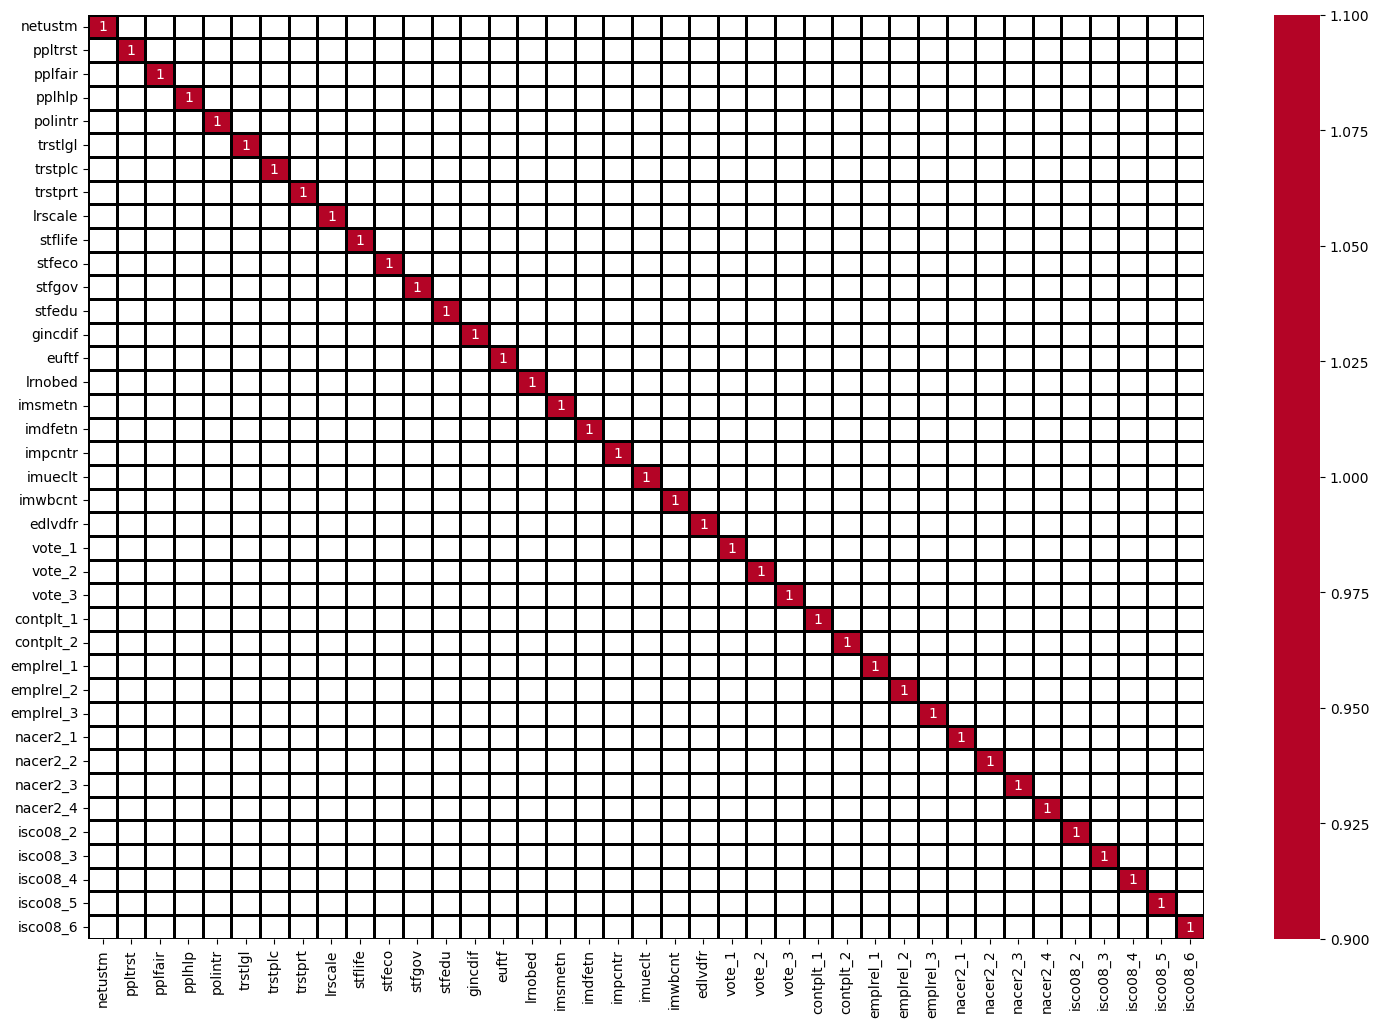

In [603]:
# I need to test multicollinearity between variables just in case before proceeding with the model.
corr = df.corr()

mask = corr <= 0.80 # This is to avoid showing the ones that have more than 0.80 correlation.

plt.figure(figsize=(18,12))
sns.heatmap(corr,
            annot = True,
            mask = mask,
            fmt = ".1g",
            center = 0,
            cmap = "coolwarm",
            linewidth = 1,
            linecolor = "black")
plt.show()

## Logit Regression

In [604]:
# Preparing the dataset for Logit Regression.

y = df["stfeco"]
X = df.drop(columns="stfeco")
X = sm.add_constant(X)

# Inspecting.
X.head()

,const,netustm,ppltrst,pplfair,pplhlp,polintr,trstlgl,trstplc,trstprt,lrscale,...,emplrel_3,nacer2_1,nacer2_2,nacer2_3,nacer2_4,isco08_2,isco08_3,isco08_4,isco08_5,isco08_6
0,1.0,480,5,5,2,2,7,7,2,5,...,0,0,0,0,1,1,0,0,0,0
1,1.0,240,6,6,5,1,5,5,4,7,...,0,0,0,0,1,0,0,1,0,0
2,1.0,240,4,5,2,3,7,8,3,7,...,0,0,0,0,1,1,0,0,0,0
3,1.0,180,0,6,4,4,6,6,0,5,...,0,0,0,0,1,0,0,1,0,0
4,1.0,60,5,6,6,3,8,9,3,5,...,0,0,1,0,0,0,0,0,0,1


In [605]:
# Applying Logit Regression.

# Creating train and test sets.

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 1502)

# Logit Regression.

logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.327602
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 stfeco   No. Observations:                 1416
Model:                          Logit   Df Residuals:                     1377
Method:                           MLE   Df Model:                           38
Date:                Fri, 23 May 2025   Pseudo R-squ.:                  0.3372
Time:                        08:58:28   Log-Likelihood:                -463.88
converged:                       True   LL-Null:                       -699.89
Covariance Type:            nonrobust   LLR p-value:                 2.785e-76
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.9688      1.675     -4.757      0.000     -11.252      -4.685
netustm       -0.0003      0.

In [606]:
# Checking which variables have statistical significance and which don't. This could be used later for creating a model that doesn't use the ones that are non-statistically significant.

pvals = result.pvalues.drop('const', errors='ignore')

# Choose your α‐level
alpha = 0.05

# Build two lists
significant_vars    = pvals.index[pvals < alpha].tolist()
insignificant_vars  = pvals.index[pvals >= alpha].tolist()

# Display
print("Significant (p < {:.2f}):".format(alpha), significant_vars)
print("Not significant (p ≥ {:.2f}):".format(alpha), insignificant_vars)

Significant (p < 0.05): ['polintr', 'trstprt', 'stflife', 'stfgov', 'stfedu', 'euftf', 'imwbcnt', 'emplrel_3']
Not significant (p ≥ 0.05): ['netustm', 'ppltrst', 'pplfair', 'pplhlp', 'trstlgl', 'trstplc', 'lrscale', 'gincdif', 'lrnobed', 'imsmetn', 'imdfetn', 'impcntr', 'imueclt', 'edlvdfr', 'vote_1', 'vote_2', 'vote_3', 'contplt_1', 'contplt_2', 'emplrel_1', 'emplrel_2', 'nacer2_1', 'nacer2_2', 'nacer2_3', 'nacer2_4', 'isco08_2', 'isco08_3', 'isco08_4', 'isco08_5', 'isco08_6']


## Performance Measures

In [607]:
# Predictions.
predictions = result.predict(X_test)
predictions = np.where(predictions > 0.5, 1, 0) # We establish a threshold to classify as correctly predicted or not.
predictions

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [608]:
# Creating confusion matrix to test accuracy.
print(confusion_matrix(y_test, predictions))
# The following line is something in the help guilines of sklearn to get the values
# of the matrix in a more readable manner.
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(tn, fp, fn, tp)

[[273  18]
 [ 32  32]]
273 18 32 32


In [609]:
# Manual Checking of Accuracy, Specificity, and Sensitivity.

# Accuracy.
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Accuracy:", round(accuracy * 100, 1), "%")

# Specificity.
specificity = tn / (tn + fp)
print("Specificity:", round(specificity * 100, 1), "%")

# Sensitivity.
sensitivity = tp / (tp + fn)
print("Sensitivity:", round(sensitivity * 100, 1), "%")

Accuracy: 85.9 %
Specificity: 93.8 %
Sensitivity: 50.0 %


## Brief Discussion of the Results

According to the p-values found in our regression model. These are the variables that have more statistical significance when trying to predict the grade of satisfaction with the state of the economy of an individual.

-*Political interest (polintr).*

-*Trust in political parties (trstprt).*

-*Life satisfaction (stflife).*

-*Satisfaction with government (stfgov)*

-*Satisfaction with education (stfedu)*

-*EU integration outlook (euftf)*

-*Immigration optimism (imwbcnt)*

-*Self-employed (emplrel_3)*



## Limitations and Possible Improvements

The first limitation is the fact that the ordinal Liker covariates where treated as numeric. To allow for flexible, non-linear effects, we could re-encode each significant Likert-scale predictor as a set of category-specific dummy variables, estimating a separate coefficient for each response level.

With the creation of a new model that takes into account only the covariates that were statistically significant from the first one, we could've later compared the performance of both.